In [112]:
import pandas as pd
import numpy as np
from feature_engine import imputation
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder as OHpre
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from feature_engine.encoding import OrdinalEncoder as OrdEncFeat
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from feature_engine.discretisation import EqualFrequencyDiscretiser
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('data/z_train.csv')
test = pd.read_csv('data/z_test.csv')

In [258]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
15322,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
15323,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
15324,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  11725 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15024 non-null  object 
 6   education_level         14957 non-null  object 
 7   major_discipline        13089 non-null  object 
 8   experience              15276 non-null  object 
 9   company_size            10592 non-null  object 
 10  company_type            10435 non-null  object 
 11  last_new_job            14987 non-null  object 
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Step-by-step Cleaning

In [261]:
df.city.value_counts(dropna=False)

city_103    3497
city_21     2156
city_16     1259
city_114    1067
city_160     670
            ... 
city_129       2
city_8         2
city_140       1
city_171       1
city_121       1
Name: city, Length: 123, dtype: int64

In [262]:
missing_ind = imputation.AddMissingIndicator()

In [263]:
df = missing_ind.fit_transform(df)

In [264]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,target,gender_na,enrolled_university_na,education_level_na,major_discipline_na,experience_na,company_size_na,company_type_na,last_new_job_na
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,36,1.0,0,0,0,0,0,1,1,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,47,0.0,0,0,0,0,0,0,0,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,83,0.0,1,0,0,0,0,1,1,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,...,52,1.0,1,1,0,0,0,1,0,0
4,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,...,24,1.0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,...,42,1.0,0,0,0,0,0,1,1,0
15322,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,...,52,1.0,0,0,0,0,0,1,1,0
15323,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,...,44,0.0,0,0,0,0,0,0,0,0
15324,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,...,97,0.0,0,0,0,1,0,0,0,0


In [265]:
df.gender.value_counts(dropna=False)

Male      10577
NaN        3601
Female      998
Other       150
Name: gender, dtype: int64

In [266]:
gender_hot = OHpre(sparse=False,handle_unknown='ignore')
oh_gender_df = pd.DataFrame(gender_hot.fit_transform(df.gender.values.reshape(-1,1))[:,:-1],columns = gender_hot.categories_[0][:-1])
oh_gender_df

,Female,Male,Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
15321,0.0,1.0,0.0
15322,0.0,1.0,0.0
15323,0.0,1.0,0.0
15324,0.0,1.0,0.0


In [267]:
df = pd.concat([df,oh_gender_df],axis=1)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,enrolled_university_na,education_level_na,major_discipline_na,experience_na,company_size_na,company_type_na,last_new_job_na,Female,Male,Other
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,0,0,0,0,1,1,0,0.0,1.0,0.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,0,0,0,0,1,1,0,0.0,0.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,...,1,0,0,0,1,0,0,0.0,0.0,0.0
4,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,...,0,0,0,0,1,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15322,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15323,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,...,0,0,0,0,0,0,0,0.0,1.0,0.0
15324,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,...,0,0,1,0,0,0,0,0.0,1.0,0.0


In [268]:
df.drop('gender',axis=1,inplace=True)

In [269]:
enrollee_id = df.enrollee_id
df.drop('enrollee_id',axis=1,inplace=True)

In [270]:
df

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,enrolled_university_na,education_level_na,major_discipline_na,experience_na,company_size_na,company_type_na,last_new_job_na,Female,Male,Other
0,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,...,0,0,0,0,1,1,0,0.0,1.0,0.0
1,city_40,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,city_21,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,...,0,0,0,0,1,1,0,0.0,0.0,0.0
3,city_115,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,...,1,0,0,0,1,0,0,0.0,0.0,0.0
4,city_176,0.764,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,...,0,0,0,0,1,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,city_173,0.878,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15322,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15323,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,...,0,0,0,0,0,0,0,0.0,1.0,0.0
15324,city_65,0.802,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,...,0,0,1,0,0,0,0,0.0,1.0,0.0


In [271]:
df.city

0        city_103
1         city_40
2         city_21
3        city_115
4        city_176
           ...   
15321    city_173
15322    city_103
15323    city_103
15324     city_65
15325     city_67
Name: city, Length: 15326, dtype: object

In [272]:
df.drop('city',axis=1,inplace=True)

In [273]:
df

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,...,enrolled_university_na,education_level_na,major_discipline_na,experience_na,company_size_na,company_type_na,last_new_job_na,Female,Male,Other
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,...,0,0,0,0,1,1,0,0.0,1.0,0.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,...,0,0,0,0,1,1,0,0.0,0.0,0.0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,...,1,0,0,0,1,0,0,0.0,0.0,0.0
4,0.764,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,...,0,0,0,0,1,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,0.878,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15322,0.920,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15323,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,...,0,0,0,0,0,0,0,0.0,1.0,0.0
15324,0.802,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,...,0,0,1,0,0,0,0,0.0,1.0,0.0


In [274]:
df.relevent_experience.value_counts()

Has relevent experience    11068
No relevent experience      4258
Name: relevent_experience, dtype: int64

In [275]:
label_exp = LabelEncoder()
df.relevent_experience = pd.DataFrame(label_exp.fit_transform(df.relevent_experience),columns=['relevant_experience'])

In [276]:
df.rename({'relevent_experience':'relevant_experience'},axis=1,inplace=True)

In [277]:
df

,city_development_index,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,...,enrolled_university_na,education_level_na,major_discipline_na,experience_na,company_size_na,company_type_na,last_new_job_na,Female,Male,Other
0,0.920,0,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,...,0,0,0,0,1,1,0,0.0,1.0,0.0
1,0.776,1,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,0.624,1,Full time course,Graduate,STEM,5,NaN,NaN,never,83,...,0,0,0,0,1,1,0,0.0,0.0,0.0
3,0.789,1,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,...,1,0,0,0,1,0,0,0.0,0.0,0.0
4,0.764,0,Part time course,Graduate,STEM,11,NaN,NaN,1,24,...,0,0,0,0,1,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,0.878,1,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15322,0.920,0,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15323,0.920,0,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,...,0,0,0,0,0,0,0,0.0,1.0,0.0
15324,0.802,0,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,...,0,0,1,0,0,0,0,0.0,1.0,0.0


In [278]:
df.enrolled_university.value_counts(dropna=False)

no_enrollment       11071
Full time course     2990
Part time course      963
NaN                   302
Name: enrolled_university, dtype: int64

In [279]:
oe_erun = OrdinalEncoder(categories=[['no_enrollment','Part time course','Full time course']],handle_unknown='use_encoded_value',unknown_value=np.nan)

In [280]:
enrol_uni_encoded_wnans = pd.DataFrame(oe_erun.fit_transform(df.enrolled_university.values.reshape(-1,1)),columns=['enrolled_university'])
enrol_uni_encoded_wnans

,enrolled_university
0,0.0
1,0.0
2,2.0
3,NaN
4,1.0
...,...
15321,0.0
15322,0.0
15323,0.0
15324,0.0


In [281]:
df.enrolled_university = enrol_uni_encoded_wnans
df

,city_development_index,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,...,enrolled_university_na,education_level_na,major_discipline_na,experience_na,company_size_na,company_type_na,last_new_job_na,Female,Male,Other
0,0.920,0,0.0,Graduate,STEM,>20,NaN,NaN,1,36,...,0,0,0,0,1,1,0,0.0,1.0,0.0
1,0.776,1,0.0,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,0.624,1,2.0,Graduate,STEM,5,NaN,NaN,never,83,...,0,0,0,0,1,1,0,0.0,0.0,0.0
3,0.789,1,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,...,1,0,0,0,1,0,0,0.0,0.0,0.0
4,0.764,0,1.0,Graduate,STEM,11,NaN,NaN,1,24,...,0,0,0,0,1,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,0.878,1,0.0,Graduate,Humanities,14,NaN,NaN,1,42,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15322,0.920,0,0.0,Graduate,STEM,14,NaN,NaN,4,52,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15323,0.920,0,0.0,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,...,0,0,0,0,0,0,0,0.0,1.0,0.0
15324,0.802,0,0.0,High School,NaN,<1,500-999,Pvt Ltd,2,97,...,0,0,1,0,0,0,0,0.0,1.0,0.0


In [282]:
df.enrolled_university.value_counts(dropna=False)

0.0    11071
2.0     2990
1.0      963
NaN      302
Name: enrolled_university, dtype: int64

In [283]:
df.education_level.value_counts(dropna=False)

Graduate          9265
Masters           3514
High School       1607
NaN                369
Phd                329
Primary School     242
Name: education_level, dtype: int64

In [284]:
oe_edlvl = OrdinalEncoder(categories=[['Primary School','High School','Graduate','Masters','Phd']],handle_unknown='use_encoded_value',unknown_value=np.nan)

In [285]:
edlvl_encoded_wnans = pd.DataFrame(oe_edlvl.fit_transform(df.education_level.values.reshape(-1,1)),columns=['education_level'])
edlvl_encoded_wnans

,education_level
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
15321,2.0
15322,2.0
15323,2.0
15324,1.0


In [286]:
df.education_level = edlvl_encoded_wnans
df

,city_development_index,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,...,enrolled_university_na,education_level_na,major_discipline_na,experience_na,company_size_na,company_type_na,last_new_job_na,Female,Male,Other
0,0.920,0,0.0,2.0,STEM,>20,NaN,NaN,1,36,...,0,0,0,0,1,1,0,0.0,1.0,0.0
1,0.776,1,0.0,2.0,STEM,15,50-99,Pvt Ltd,>4,47,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,0.624,1,2.0,2.0,STEM,5,NaN,NaN,never,83,...,0,0,0,0,1,1,0,0.0,0.0,0.0
3,0.789,1,NaN,2.0,Business Degree,<1,NaN,Pvt Ltd,never,52,...,1,0,0,0,1,0,0,0.0,0.0,0.0
4,0.764,0,1.0,2.0,STEM,11,NaN,NaN,1,24,...,0,0,0,0,1,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,0.878,1,0.0,2.0,Humanities,14,NaN,NaN,1,42,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15322,0.920,0,0.0,2.0,STEM,14,NaN,NaN,4,52,...,0,0,0,0,1,1,0,0.0,1.0,0.0
15323,0.920,0,0.0,2.0,STEM,>20,50-99,Pvt Ltd,4,44,...,0,0,0,0,0,0,0,0.0,1.0,0.0
15324,0.802,0,0.0,1.0,NaN,<1,500-999,Pvt Ltd,2,97,...,0,0,1,0,0,0,0,0.0,1.0,0.0


In [287]:
df[df.major_discipline.isna()][['education_level','major_discipline','enrolled_university']]

,education_level,major_discipline,enrolled_university
5,1.0,NaN,0.0
9,1.0,NaN,2.0
12,NaN,NaN,NaN
13,1.0,NaN,2.0
23,1.0,NaN,0.0
...,...,...,...
15310,0.0,NaN,0.0
15312,NaN,NaN,0.0
15319,2.0,NaN,2.0
15324,1.0,NaN,0.0


In [288]:
df.loc[df.education_level<=1,'major_discipline'] = 'No Major'

In [289]:
df.major_discipline.value_counts(dropna=False)

STEM               11609
No Major            2028
Humanities           530
NaN                  388
Other                308
Business Degree      259
Arts                 204
Name: major_discipline, dtype: int64

In [290]:
df.loc[(df.education_level==0)&(df.enrolled_university.isna()),'enrolled_university']=0

In [291]:
df.experience.value_counts(dropna=False)

>20    2633
5      1148
4      1104
3      1084
6       971
2       905
7       835
10      793
9       780
8       643
15      553
11      538
14      479
1       440
16      420
<1      408
12      384
13      304
17      281
19      235
18      225
20      113
NaN      50
Name: experience, dtype: int64

In [292]:
df.experience = df.experience.fillna(0)

In [293]:
df.loc[df.experience=='>20','experience']=21

In [294]:
df.loc[df.experience=='<1','experience']=0.5

In [295]:
df.experience.value_counts(dropna=False)

21     2633
5      1148
4      1104
3      1084
6       971
2       905
7       835
10      793
9       780
8       643
15      553
11      538
14      479
1       440
16      420
0.5     408
12      384
13      304
17      281
19      235
18      225
20      113
0        50
Name: experience, dtype: int64

In [296]:
df.experience = pd.to_numeric(df.experience)

(array([ 458.,  440.,  905., 1084., 1104., 1148.,  971.,    0.,  835.,
         643.,  780.,  793.,  538.,  384.,  304.,    0.,  479.,  553.,
         420.,  281.,  225.,  235.,  113., 2633.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,
         7.   ,  7.875,  8.75 ,  9.625, 10.5  , 11.375, 12.25 , 13.125,
        14.   , 14.875, 15.75 , 16.625, 17.5  , 18.375, 19.25 , 20.125,
        21.   ]),
 <BarContainer object of 24 artists>)

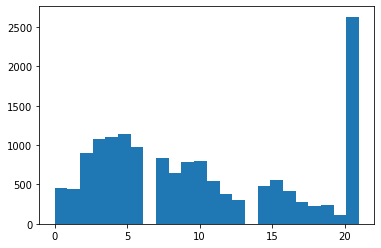

In [297]:
plt.hist(df.experience,bins=24)

In [298]:
df.last_new_job.value_counts(dropna=False)

1        6458
>4       2627
2        2318
never    1945
4         823
3         816
NaN       339
Name: last_new_job, dtype: int64

In [300]:
oe_lastjob = OrdinalEncoder(categories=[['never','1','2','3','>4']],handle_unknown='use_encoded_value',unknown_value=np.nan)

In [301]:
last_job_encoded_wnans = pd.DataFrame(oe_lastjob.fit_transform(df.last_new_job.values.reshape(-1,1)),columns=['last_new_job'])
last_job_encoded_wnans

,last_new_job
0,1.0
1,4.0
2,0.0
3,0.0
4,1.0
...,...
15321,1.0
15322,NaN
15323,NaN
15324,2.0


In [302]:
df.last_new_job = last_job_encoded_wnans

In [303]:
df.last_new_job.value_counts(dropna=False)

1.0    6458
4.0    2627
2.0    2318
0.0    1945
NaN    1162
3.0     816
Name: last_new_job, dtype: int64

In [304]:
df.company_size.value_counts(dropna=False).index

Index([        nan,     '50-99',   '100-500',    '10000+',     '10/49',
       '1000-4999',       '<10',   '500-999', '5000-9999'],
      dtype='object')

In [305]:
copy = df.copy()

In [306]:
size_cont = [75, 300, 10500,28,3000,5,750,7500]

In [307]:
for i in range(df.company_size.value_counts().index.size):
    df.loc[df.company_size==f'{df.company_size.value_counts().index[i]}','company_size'] = size_cont[i]

In [308]:
df.company_size = pd.to_numeric(df.company_size)

In [309]:
df.company_type.value_counts(dropna=False)

Pvt Ltd                7873
NaN                    4891
Funded Startup          792
Public Sector           773
Early Stage Startup     489
NGO                     421
Other                    87
Name: company_type, dtype: int64

### Cleaning and Labeling thus far:

In [3]:
def cleaning_labeling(df):    
    missing_ind = imputation.AddMissingIndicator()
    df = missing_ind.fit_transform(df)

    gender_hot = OHpre(sparse=False,handle_unknown='ignore')
    oh_gender_df = pd.DataFrame(gender_hot.fit_transform(df.gender.values.reshape(-1,1))[:,:-1],columns = ['gender_'+i for i in gender_hot.categories_[0][:-1]])
    df = pd.concat([df,oh_gender_df],axis=1)
    df.drop('gender',axis=1,inplace=True)

    enrollee_id = df.enrollee_id
    df.drop('enrollee_id',axis=1,inplace=True)

    df.drop('city',axis=1,inplace=True)

    label_exp = LabelEncoder()
    df.relevent_experience = pd.DataFrame(label_exp.fit_transform(df.relevent_experience),columns=['relevant_experience'])
    df.rename({'relevent_experience':'relevant_experience'},axis=1,inplace=True)

    oe_erun = OrdinalEncoder(categories=[['no_enrollment','Part time course','Full time course']],handle_unknown='use_encoded_value',unknown_value=np.nan)
    enrol_uni_encoded_wnans = pd.DataFrame(oe_erun.fit_transform(df.enrolled_university.values.reshape(-1,1)),columns=['enrolled_university'])
    df.enrolled_university = enrol_uni_encoded_wnans

    oe_edlvl = OrdinalEncoder(categories=[['Primary School','High School','Graduate','Masters','Phd']],handle_unknown='use_encoded_value',unknown_value=np.nan)
    edlvl_encoded_wnans = pd.DataFrame(oe_edlvl.fit_transform(df.education_level.values.reshape(-1,1)),columns=['education_level'])
    df.education_level = edlvl_encoded_wnans

    df.loc[df.education_level<=1,'major_discipline'] = 'No Major'
    df.loc[(df.education_level==0)&(df.enrolled_university.isna()),'enrolled_university']=0

    df.experience = df.experience.fillna(0)
    df.loc[df.experience=='>20','experience']=21
    df.loc[df.experience=='<1','experience']=0.5

    df.experience = pd.to_numeric(df.experience)

    oe_lastjob = OrdinalEncoder(categories=[['never','1','2','3','>4']],handle_unknown='use_encoded_value',unknown_value=np.nan)
    last_job_encoded_wnans = pd.DataFrame(oe_lastjob.fit_transform(df.last_new_job.values.reshape(-1,1)),columns=['last_new_job'])
    df.last_new_job = last_job_encoded_wnans

    size_cont = [75, 300, 10500,28,3000,5,750,7500]
    for i in range(df.company_size.value_counts().index.size):
        df.loc[df.company_size==f'{df.company_size.value_counts().index[i]}','company_size'] = size_cont[i]
    df.company_size = pd.to_numeric(df.company_size)
    return df

### Imputation Method1: Disregard company type and Major Discipline, impute the rest with IterativeImputer

In [4]:
def ImpMethod1(df):
    df_labeled = cleaning_labeling(df)
    
    ctype_hot = OHpre(sparse=False,handle_unknown='ignore')
    oh_ctype_df = pd.DataFrame(ctype_hot.fit_transform(df.company_type.values.reshape(-1,1))[:,:-1],columns = ['ctype_'+i.replace(' ','') for i in ctype_hot.categories_[0][:-1]])
    df_labeled = pd.concat([df_labeled,oh_ctype_df],axis=1)
    df_labeled.drop('company_type',axis=1,inplace=True)
    
    major_hot = OHpre(sparse=False,handle_unknown='ignore')
    oh_major_df = pd.DataFrame(major_hot.fit_transform(df.major_discipline.values.reshape(-1,1))[:,:-1],columns = ['major_'+i.replace(' ','') for i in major_hot.categories_[0][:-1]])
    df_labeled = pd.concat([df_labeled,oh_major_df],axis=1)
    df_labeled.drop('major_discipline',axis=1,inplace=True)
    
    imp = IterativeImputer(max_iter=10, random_state=0)
    imputed = pd.DataFrame(imp.fit_transform(df_labeled), columns=[df_labeled.columns])
    imputed.columns = [imputed.columns[i][0] for i in range(imputed.columns.size)]
    if 'target' in imputed.columns:
        y = imputed.target
        imputed.drop('target',axis=1,inplace=True)
    else: y=0
    
    norm_scaler = MinMaxScaler()
    imputed = pd.DataFrame(norm_scaler.fit_transform(imputed),columns=imputed.columns)       # Added Normalization
    return imputed, y

In [5]:
dfM1, target_df = ImpMethod1(df)

In [6]:
test_imp, _ =ImpMethod1(test)

### Logistic Regression ImpMethod1

In [347]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(dfM1, target_df)

LogisticRegression(solver='liblinear')

In [352]:
test_imp, _ =ImpMethod1(test)

In [358]:
preds_logr = logreg.predict_proba(test_imp)[:,1]

In [362]:
submission1_logreg = pd.DataFrame(zip(test.enrollee_id,preds_logr),columns=['enrollee_id','target'])

In [384]:
submission1_logreg

,enrollee_id,target
0,23603,0.408811
1,22499,0.065886
2,10465,0.607654
3,8293,0.120105
4,4246,0.084339
...,...,...
3827,8880,0.513894
3828,7886,0.103216
3829,12279,0.166354
3830,5326,0.208842


In [428]:
submission1_logreg.to_csv('Submissions/logreg.csv',index=False)

### Trying out std scaler with logreg:

In [397]:
std_scaler = StandardScaler()

In [398]:
dfM1_std_scaled = pd.DataFrame(std_scaler.fit_transform(dfM1),columns=dfM1.columns)

In [409]:
test_imp_std_scaled = pd.DataFrame(std_scaler.fit_transform(test_imp), columns=test_imp.columns)

In [401]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(dfM1_std_scaled, target_df)

LogisticRegression(solver='liblinear')

In [416]:
preds_logr_std_scaled = logreg.predict_proba(test_imp_std_scaled)[:,1]

In [417]:
logreg_m1_scaled = pd.DataFrame(zip(test.enrollee_id,preds_logr_std_scaled),columns=['enrollee_id','target'])

In [412]:
logreg_m1_scaled.to_csv('Submissions/logreg_m1_scaled_fixed.csv',index=False)

### Trying out norm scaler with logreg:

In [405]:
norm_scaler = MinMaxScaler()

In [406]:
dfM1_norm_scaled = pd.DataFrame(norm_scaler.fit_transform(dfM1),columns=dfM1.columns)

In [407]:
test_imp_norm_scaled = pd.DataFrame(norm_scaler.fit_transform(test_imp), columns=test_imp.columns)

In [408]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(dfM1_norm_scaled, target_df)

LogisticRegression(solver='liblinear')

In [413]:
preds_logr_norm_scaled = logreg.predict_proba(test_imp_norm_scaled)[:,1]

In [418]:
logreg_m1_norm_scaled = pd.DataFrame(zip(test.enrollee_id,preds_logr_norm_scaled),columns=['enrollee_id','target'])

In [ ]:
logreg_m1_norm_scaled.to_csv('Submissions/logreg_m1_scaled_fixed.csv',index=False)

### Over and Under Sampling

In [10]:
underSampler = RandomUnderSampler(sampling_strategy = 'majority')
overSampler = RandomOverSampler(sampling_strategy = 'minority')

In [13]:
over = SMOTE()

In [24]:
dfM1_oversamp, target_oversamp = SMOTE(sampling_strategy=0.8).fit_resample(dfM1, target_df)

In [25]:
dfM1_oversamp

,city_development_index,relevant_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,gender_na,enrolled_university_na,...,ctype_NGO,ctype_Other,ctype_PublicSector,ctype_PvtLtd,major_Arts,major_BusinessDegree,major_Humanities,major_NoMajor,major_Other,major_STEM
0,0.942116,0.000000,0.160873,0.50,1.000000,0.307049,0.250000,0.104478,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.654691,1.000000,0.160873,0.50,0.714286,0.099493,1.000000,0.137313,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.351297,1.000000,1.000000,0.50,0.238095,0.266770,0.000000,0.244776,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.680639,1.000000,0.485436,0.50,0.023810,0.319413,0.000000,0.152239,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.630739,0.000000,0.580437,0.50,0.523810,0.268588,0.250000,0.068657,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20698,0.821421,0.795716,1.000000,0.50,0.000000,0.227283,0.250000,0.224899,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20699,0.899292,1.000000,0.160873,0.75,0.509510,0.360259,0.412537,0.049859,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20700,0.203593,0.000000,0.330924,0.50,0.162157,0.108600,0.250000,0.268691,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20701,0.414480,0.000000,0.160873,0.50,0.398017,0.178768,0.946529,0.068018,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
target_oversamp.value_counts()

0.0    11502
1.0     9201
Name: target, dtype: int64

In [30]:
dfM1_over_under, target_ou = underSampler.fit_resample(dfM1_oversamp, target_oversamp)

In [31]:
dfM1_over_under

,city_development_index,relevant_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,gender_na,enrolled_university_na,...,ctype_NGO,ctype_Other,ctype_PublicSector,ctype_PvtLtd,major_Arts,major_BusinessDegree,major_Humanities,major_NoMajor,major_Other,major_STEM
0,0.351297,0.000000,1.000000,0.50,0.142857,1.000000,0.250000,0.313433,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.351297,1.000000,1.000000,0.25,0.380952,0.203481,0.000000,0.328358,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.954092,1.000000,1.000000,0.25,0.619048,0.257087,0.000000,0.092537,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.954092,0.000000,0.160873,0.00,1.000000,0.099493,0.250000,0.050746,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.896208,0.000000,0.580437,0.50,0.476190,1.000000,0.250000,0.074627,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18397,0.821421,0.795716,1.000000,0.50,0.000000,0.227283,0.250000,0.224899,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18398,0.899292,1.000000,0.160873,0.75,0.509510,0.360259,0.412537,0.049859,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18399,0.203593,0.000000,0.330924,0.50,0.162157,0.108600,0.250000,0.268691,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18400,0.414480,0.000000,0.160873,0.50,0.398017,0.178768,0.946529,0.068018,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
target_ou.value_counts()

0.0    9201
1.0    9201
Name: target, dtype: int64

In [34]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(dfM1_over_under, target_ou)

LogisticRegression(solver='liblinear')

In [38]:
preds_logr_sampled = logreg.predict_proba(test_imp)[:,1]

In [39]:
logreg_sampled_sub = pd.DataFrame(zip(test.enrollee_id,preds_logr_sampled),columns=['enrollee_id','target'])

In [40]:
logreg_sampled_sub.to_csv('Submissions/logreg_sampled_sub.csv',index=False)

In [41]:
logreg_sampled_sub

,enrollee_id,target
0,23603,0.656046
1,22499,0.138139
2,10465,0.863571
3,8293,0.234096
4,4246,0.190563
...,...,...
3827,8880,0.797743
3828,7886,0.222888
3829,12279,0.313207
3830,5326,0.458698


### Custom Sampler

In [43]:
def CustomSampler(features, target):    
    over = SMOTE()
    underSampler = RandomUnderSampler(sampling_strategy = 'majority')
    features_oversamp, target_oversamp = SMOTE(sampling_strategy=0.8).fit_resample(features, target)
    features_over_under, target_ou = underSampler.fit_resample(features_oversamp, target_oversamp)
    return features_over_under, target_ou

In [66]:
X_train, y_train = CustomSampler(dfM1, target_df)

### KNN Using GridSearch

In [55]:
vecinos = KNeighborsClassifier()

In [59]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10], 'weights':['uniform','distance']}

In [60]:
gridKn = GridSearchCV(vecinos, params, scoring = 'accuracy')

In [61]:
X_train, y_train = CustomSampler(dfM1, target_df)

In [62]:
gridKn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [63]:
gridKn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [72]:
preds_knn = gridKn.predict_proba(test_imp)[:,1]
knn_sub = pd.DataFrame(zip(test.enrollee_id,preds_knn),columns=['enrollee_id','target'])
knn_sub.to_csv('Submissions/knn_sub.csv',index=False)

In [73]:
knn_sub

,enrollee_id,target
0,23603,1.0
1,22499,0.0
2,10465,0.0
3,8293,0.0
4,4246,0.0
...,...,...
3827,8880,0.0
3828,7886,0.0
3829,12279,0.0
3830,5326,0.0


In [75]:
preds_knn

array([1., 0., 0., ..., 0., 0., 0.])

### Random Forest

In [88]:
rf = RandomForestClassifier()
params = {'n_estimators':[275, 300, 325], 'criterion':['gini','entropy']}
gsRf = GridSearchCV(rf, params)

In [89]:
gsRf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [275, 300, 325]})

In [90]:
gsRf.best_estimator_

RandomForestClassifier(n_estimators=300)

In [91]:
preds_rf = gsRf.predict_proba(test_imp)[:,1]
rf_sub = pd.DataFrame(zip(test.enrollee_id,preds_rf),columns=['enrollee_id','target'])
rf_sub.to_csv('Submissions/rf_sub.csv',index=False)

In [92]:
rf_sub

,enrollee_id,target
0,23603,0.286667
1,22499,0.173333
2,10465,0.293333
3,8293,0.063333
4,4246,0.156667
...,...,...
3827,8880,0.520000
3828,7886,0.033333
3829,12279,0.126667
3830,5326,0.113333


### Extra Trees

In [93]:
extratree = ExtraTreesClassifier()
params = {'n_estimators':[100, 250,500, 750,1000],'criterion':['gini','entropy']}
gsET = GridSearchCV(extratree, params)

In [94]:
gsET.fit(X_train, y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 250, 500, 750, 1000]})

In [96]:
gsET.best_estimator_

ExtraTreesClassifier(criterion='entropy', n_estimators=750)

In [98]:
preds_ext = gsET.predict_proba(test_imp)[:,1]
ext_sub = pd.DataFrame(zip(test.enrollee_id,preds_ext),columns=['enrollee_id','target'])
ext_sub.to_csv('Submissions/ext_sub.csv',index=False)

In [99]:
ext_sub

,enrollee_id,target
0,23603,0.170667
1,22499,0.213333
2,10465,0.304000
3,8293,0.148000
4,4246,0.124000
...,...,...
3827,8880,0.436000
3828,7886,0.061333
3829,12279,0.064000
3830,5326,0.132000


In [101]:
gsET.score(X_train,y_train)

0.9996739484838605

### SVM

In [120]:
svm = SVC()
params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],}
gsSVM = GridSearchCV(svm, params)

In [121]:
gsSVM.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [122]:
gsSVM.best_estimator_

SVC(kernel='poly')

In [130]:
svm = SVC(kernel='poly',probability=True)

In [131]:
svm.fit(X_train, y_train)

SVC(kernel='poly', probability=True)

In [132]:
preds_svm = svm.predict_proba(test_imp)[:,1]
svm_sub = pd.DataFrame(zip(test.enrollee_id,preds_svm),columns=['enrollee_id','target'])
svm_sub.to_csv('Submissions/svm_sub.csv',index=False)

In [134]:
svm_sub

,enrollee_id,target
0,23603,0.122723
1,22499,0.090654
2,10465,0.361239
3,8293,0.227795
4,4246,0.160265
...,...,...
3827,8880,0.397357
3828,7886,0.196711
3829,12279,0.074345
3830,5326,0.163840


### Naive Bayes